<a href="https://colab.research.google.com/github/songokunr1/Data-Analyst/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Miary jakości
from sklearn.metrics import precision_score

# Przechowywanie modeli
import pickle

# tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/songokunr1/Data-Analyst/master/titanic.csv')

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
titanic[titanic['Survived'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 8 columns):
Survived    549 non-null int64
Pclass      549 non-null int64
Sex         549 non-null object
Age         424 non-null float64
SibSp       549 non-null int64
Parch       549 non-null int64
Fare        549 non-null float64
Embarked    549 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 38.6+ KB


In [ ]:
titanic[titanic['Survived'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 8 columns):
Survived    342 non-null int64
Pclass      342 non-null int64
Sex         342 non-null object
Age         290 non-null float64
SibSp       342 non-null int64
Parch       342 non-null int64
Fare        342 non-null float64
Embarked    340 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 24.0+ KB


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) #axis =0 wiersze 1->kolumny

In [ ]:
titanic_cleaned = titanic.drop_duplicates()

In [ ]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 8 columns):
Survived    780 non-null int64
Pclass      780 non-null int64
Sex         780 non-null object
Age         676 non-null float64
SibSp       780 non-null int64
Parch       780 non-null int64
Fare        780 non-null float64
Embarked    778 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
titanic_cleaned = titanic_cleaned.dropna()
titanic_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

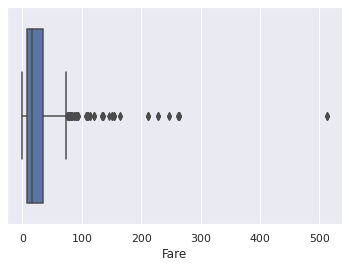

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
sns.boxplot(x=titanic_cleaned['Fare'])
#mediana + najmniejsza + najwieksza + iqr

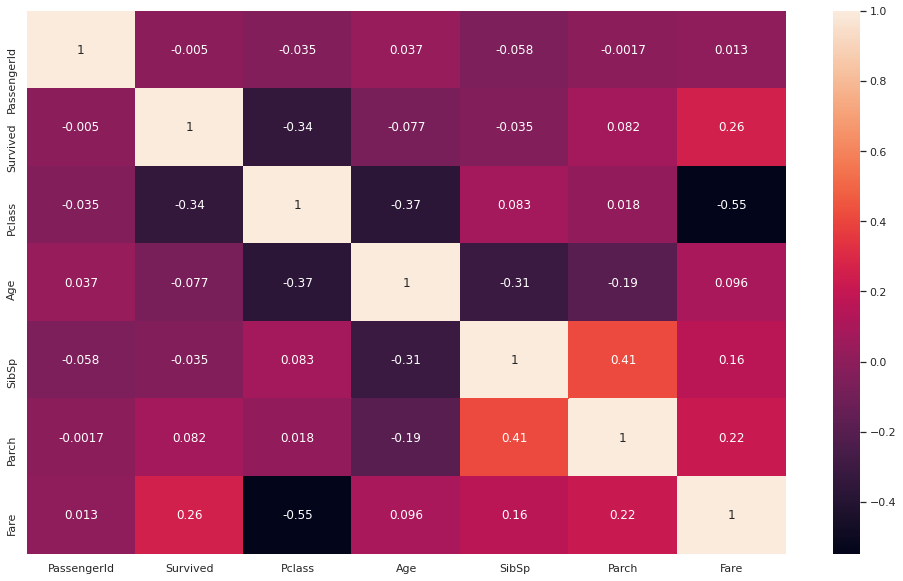

In [ ]:
plt.figure(figsize=(17,10))
correlatons = titanic.corr()
sns.heatmap(correlatons, annot=True)
# zmienic sex na wartosc liczbowa

In [ ]:
titanic_model = titanic_cleaned.drop(['Embarked', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=False) #axis =0 wiersze 1->kolumny
titanic_model.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 890
Data columns (total 4 columns):
Survived    674 non-null int64
Pclass      674 non-null int64
Age         674 non-null float64
Fare        674 non-null float64
dtypes: float64(2), int64(2)
memory usage: 26.3 KB


In [ ]:
def get_normalized_column(df, column_name):
    return (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())

In [ ]:
norm_column = get_normalized_column(titanic_model, "Fare")
titanic_model["Fare"] = norm_column
norm_column = get_normalized_column(titanic_model, "Pclass")
titanic_model["Pclass"] = norm_column
norm_column = get_normalized_column(titanic_model, "Age")
titanic_model["Age"] = norm_column
titanic_model.head(5)

,Survived,Pclass,Age,Fare
0,0,1.0,0.271174,0.014151
1,1,0.0,0.472229,0.139136
2,1,1.0,0.321438,0.015469
3,1,0.0,0.434531,0.103644
4,0,1.0,0.434531,0.015713


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = titanic_model.drop(columns="Survived")
y = titanic_model.loc[:, "Survived"]
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

print("Zbiór treningowy:", train_X.shape, train_y.shape)
print("Zbiór testowy:", test_X.shape, test_y.shape)
test_y

Zbiór treningowy: (471, 3) (471,)
Zbiór testowy: (203, 3) (203,)


803    1
389    1
818    0
723    0
484    1
      ..
514    0
225    0
561    0
545    0
108    0
Name: Survived, Length: 203, dtype: int64

In [ ]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10
  # miejsce na hiperparametry
)

# uczenie modelu KNN
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
predicted_y = knn.predict(test_X)

In [ ]:
precision = precision_score(test_y, predicted_y, average="micro")
print("Precyzja: {:.2f}".format(precision))

Precyzja: 0.73


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print("Zbiór treningowy:", train_X.shape, train_y.shape)
print("Zbiór testowy:", test_X.shape, test_y.shape)

Zbiór treningowy: (539, 3) (539,)
Zbiór testowy: (135, 3) (135,)


In [ ]:
tree = DecisionTreeClassifier(max_leaf_nodes=12,max_depth=5
  # miejsce na hiperparametry
)

# uczenie modelu drzewa decyzyjnego
tree.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predykcja na zbiorze testowym
predicted_y = tree.predict(test_X)

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(test_y, predicted_y, average="micro")
print("Precyzja: {:.2f}".format(precision))

Precyzja: 0.72


In [ ]:
# find the best leaf
for xx in range(2,35):
  for yy in range (2,15):
    tree = DecisionTreeClassifier(max_leaf_nodes=xx,max_depth=yy
      # miejsce na hiperparametry
    )

    # uczenie modelu drzewa decyzyjnego
    tree.fit(train_X, train_y)

    # predykcja na zbiorze testowym
    predicted_y = tree.predict(test_X)
    predicted_y
    from sklearn.metrics import precision_score
    precision = precision_score(test_y, predicted_y, average="micro")
    print("max_leaf_nodes={} and max_depth={} Precyzja: {:.2f}".format(xx,yy, precision))



max_leaf_nodes=2 and max_depth=2 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=3 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=4 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=5 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=6 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=7 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=8 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=9 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=10 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=11 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=12 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=13 Precyzja: 0.70
max_leaf_nodes=2 and max_depth=14 Precyzja: 0.70
max_leaf_nodes=3 and max_depth=2 Precyzja: 0.71
max_leaf_nodes=3 and max_depth=3 Precyzja: 0.71
max_leaf_nodes=3 and max_depth=4 Precyzja: 0.71
max_leaf_nodes=3 and max_depth=5 Precyzja: 0.71
max_leaf_nodes=3 and max_depth=6 Precyzja: 0.71
max_leaf_nodes=3 and max_depth=7 Precyzja: 0.71
max_leaf_nodes=3 and max_depth=8 Precyzja: 0.71
max_leaf_nodes=3 and max_depth=9 Pr

In [ ]:
# przedstawienie w formie graficznej:
# sprawdzenie modelu recall accurancy etp
# cross validation
# sex change into 0/1
# przetestuj osobe konkretna